In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
df =pd.read_csv("uber.csv")

In [162]:
df.shape

(200000, 9)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [165]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [166]:
df=df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [167]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [168]:
df.shape

(200000, 6)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [170]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [171]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [172]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace =True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [173]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

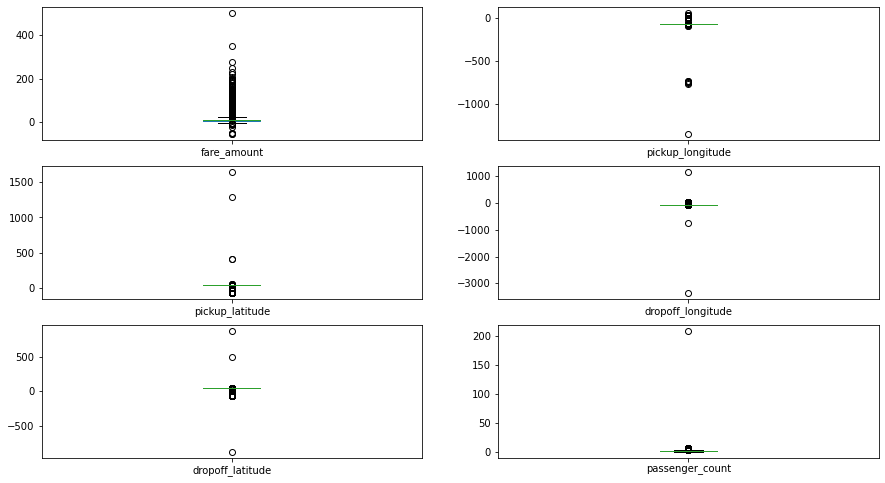

In [174]:
df.plot(kind="box",subplots= True,layout =(7,2),figsize=(15,20))

In [175]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
    
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [176]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

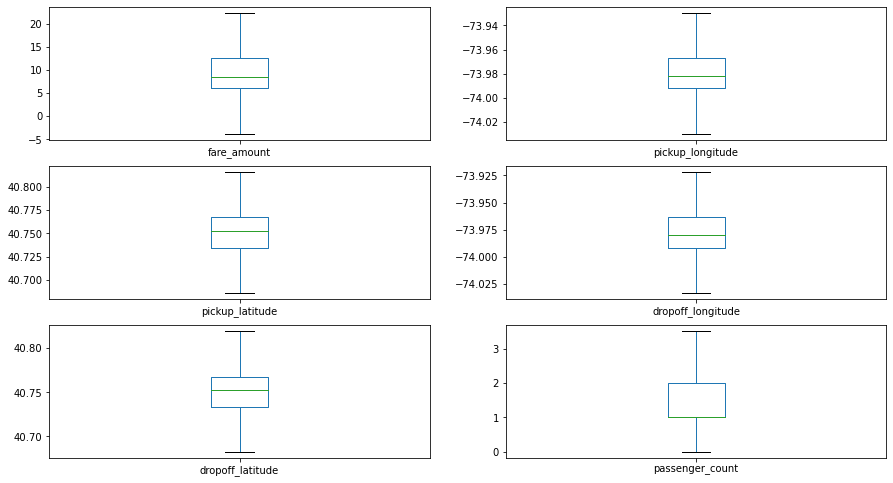

In [177]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

<AxesSubplot:>

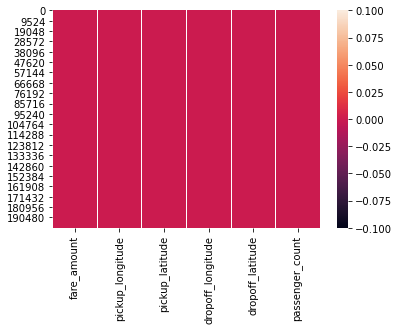

In [178]:
sns.heatmap(df.isnull())

In [179]:
corr =df.corr()

In [180]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000


<AxesSubplot:>

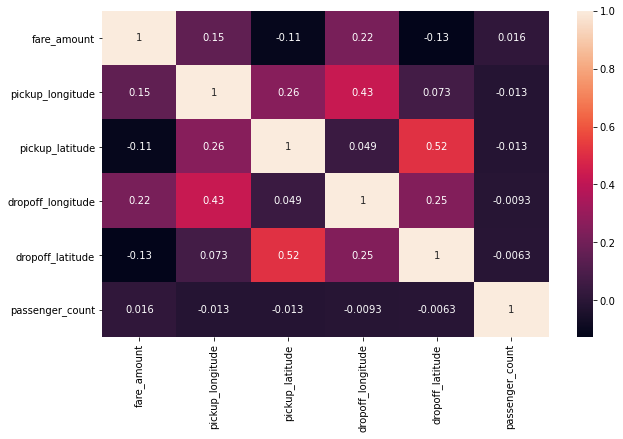

In [181]:
fig,axis =plt.subplots(figsize =(10,6))
sns.heatmap(df.corr(),annot =True)

In [182]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [183]:
#Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [184]:
X_train

array([[  7.5     , -73.971292,  40.795207, -73.959458,  40.8139  ],
       [ 21.7     , -73.96145 ,  40.780129, -73.998269,  40.745233],
       [  4.9     , -73.966006,  40.765298, -73.968169,  40.755546],
       ...,
       [ 20.5     , -73.96131 ,  40.769995, -74.004683,  40.741877],
       [ 15.5     , -73.991765,  40.726162, -73.93735 ,  40.712765],
       [ 15.      , -73.987935,  40.718597, -73.95336 ,  40.771442]])

In [185]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [186]:
regression.fit(X_train,y_train)


LinearRegression()

In [187]:
regression.intercept_ #To find the linear intercept

-36.74074201713836

In [188]:
 regression.coef_ 

array([ 0.00250894, -0.37562291, -0.43758896, -0.3160671 ,  0.1200425 ])

In [189]:
prediction = regression.predict(X_test) #To predict the target values

In [190]:
print(prediction)

[1.50170771 1.49178831 1.52265588 ... 1.50564651 1.52588587 1.5075277 ]


In [191]:
#Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error
from sklearn.metrics import r2_score

In [192]:
r2_score(y_test,prediction)

0.0007016378754812758

In [193]:
from sklearn.metrics import mean_squared_error

In [194]:
MSE = mean_squared_error(y_test,prediction)

In [195]:
MSE

0.7671513329714154

In [196]:
RMSE=np.sqrt(MSE)

In [197]:
RMSE

0.8758717560073594

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
 rf.fit(X_train,y_train)
    RandomForestRegressor()

In [ ]:
 rf.fit(X_train,y_train)

In [ ]:
 y_pred

In [ ]:
#Metric Evalutaion for random forest

In [ ]:
R2_Random

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)


In [ ]:
 RMSE_Random